<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S3_5_1_Graduate_Admission_Exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graduate Admission 

Nous allons étudier les facteurs qui déterminent l'admission d'un élève à un master en université américaine. 

Parmi ces facteurs, on compte : 

1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

0. Importez les librairies usuelles

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Importez le dataset et affichez le sous forme de DataFrame 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [28]:
df = pd.read_csv('/content/drive/My Drive/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


2. Notre variable est exprimée comme une probabilité. On voudrait que ce soit plutôt une classe. Remplacez donc toutes les probabilités supérieures à 75% par 1 et les autres par 0 

In [29]:
chance  = np.array(df.iloc[:,-1:])
df["Chance of Admit"] = [1 if float(i) > 0.75 else 0 for i in chance]
df = df.drop("Chance of Admit ", axis= 1)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


3. Regardez la répartition de GRE Score par rapport à l'admission 

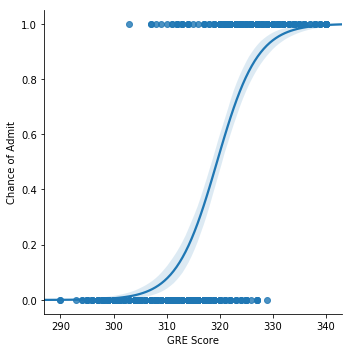

In [25]:
sns.lmplot(x="GRE Score", y="Chance of Admit", data=df, logistic=True)

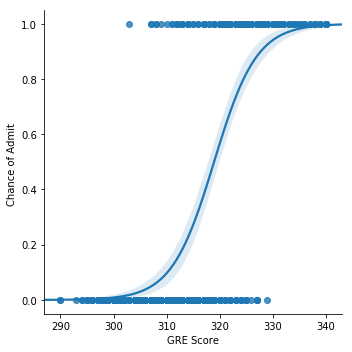

4. Faites de même avec le Toefl Score  / CGPA

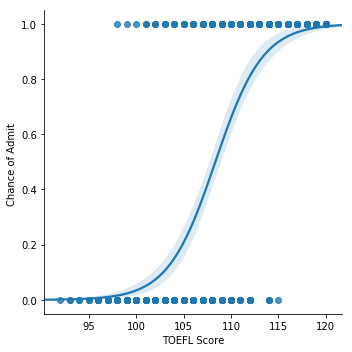

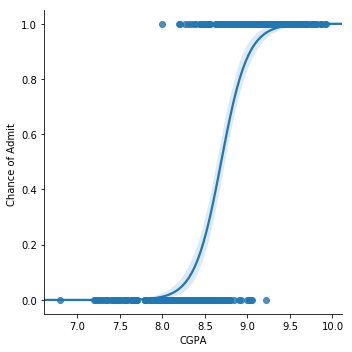

5. Faites un barplot sur la colonne LOR / SOP / University Rating / Research

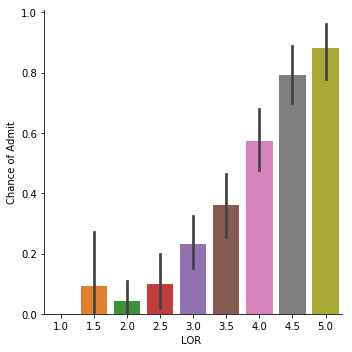

In [30]:
sns.catplot(x="LOR ", y="Chance of Admit", kind="bar", data=df)

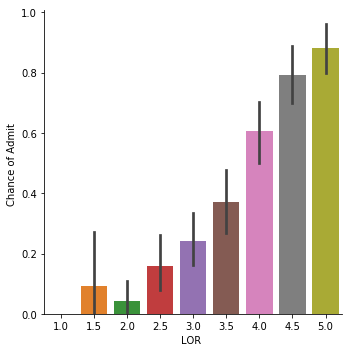

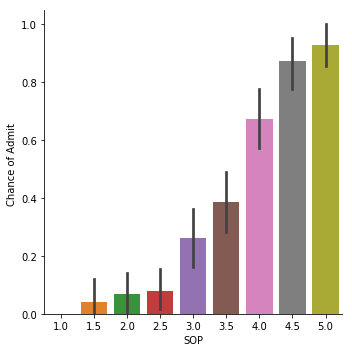

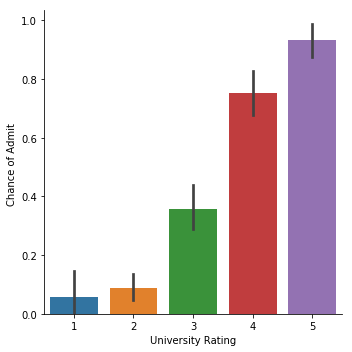

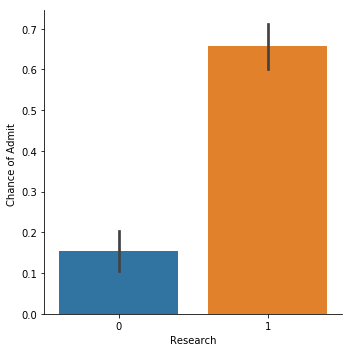

6. Séparez votre dataset en variables explicatives : ```X``` & variable cible : ```y``` 

In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


7. Séparez votre dataset en données d'entrainement et de test 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y)

8. Tentez de faire un premier arbre de décision et évaluez votre score dans une matrice de confusion

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier_gini = DecisionTreeClassifier(criterion="gini")
classifier_gini.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
classifier_gini.score(X_test, y_test)

0.8466666666666667

0.8666666666666667

9. Visualisez votre arbre via graphviz 

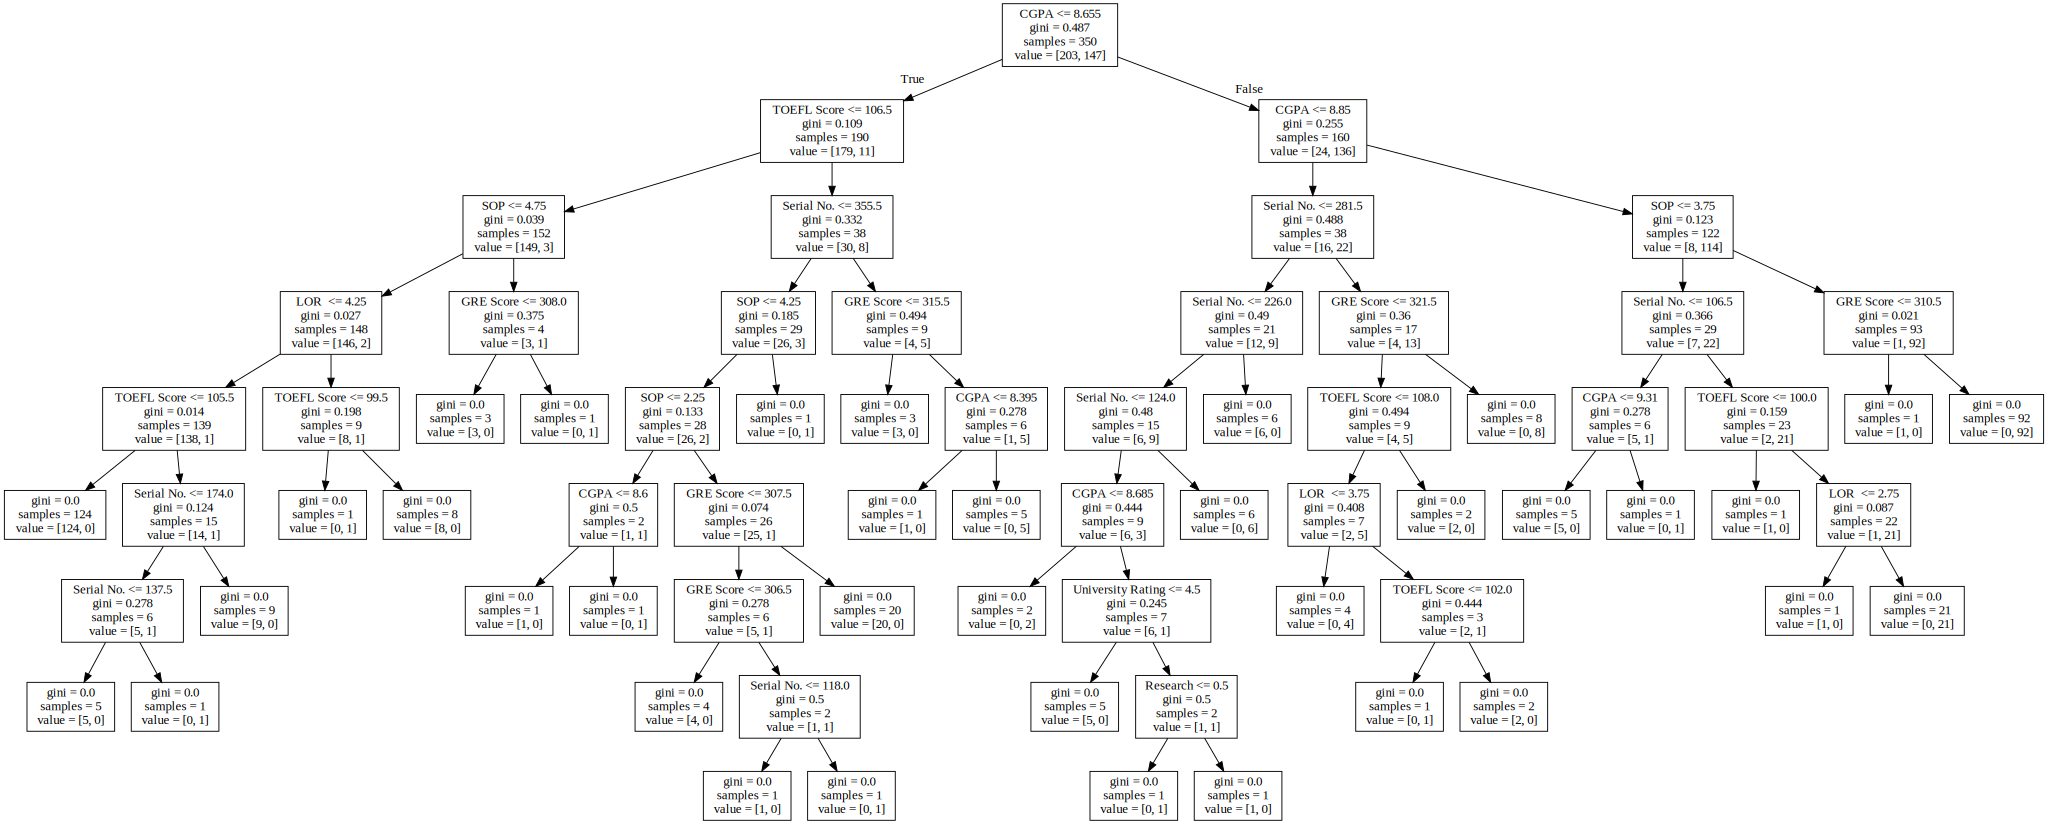

In [35]:
import graphviz 
from sklearn.tree import export_graphviz
dot_data = export_graphviz(classifier_gini, out_file=None, feature_names= X.columns) 
graph = graphviz.Source(dot_data) 
graph

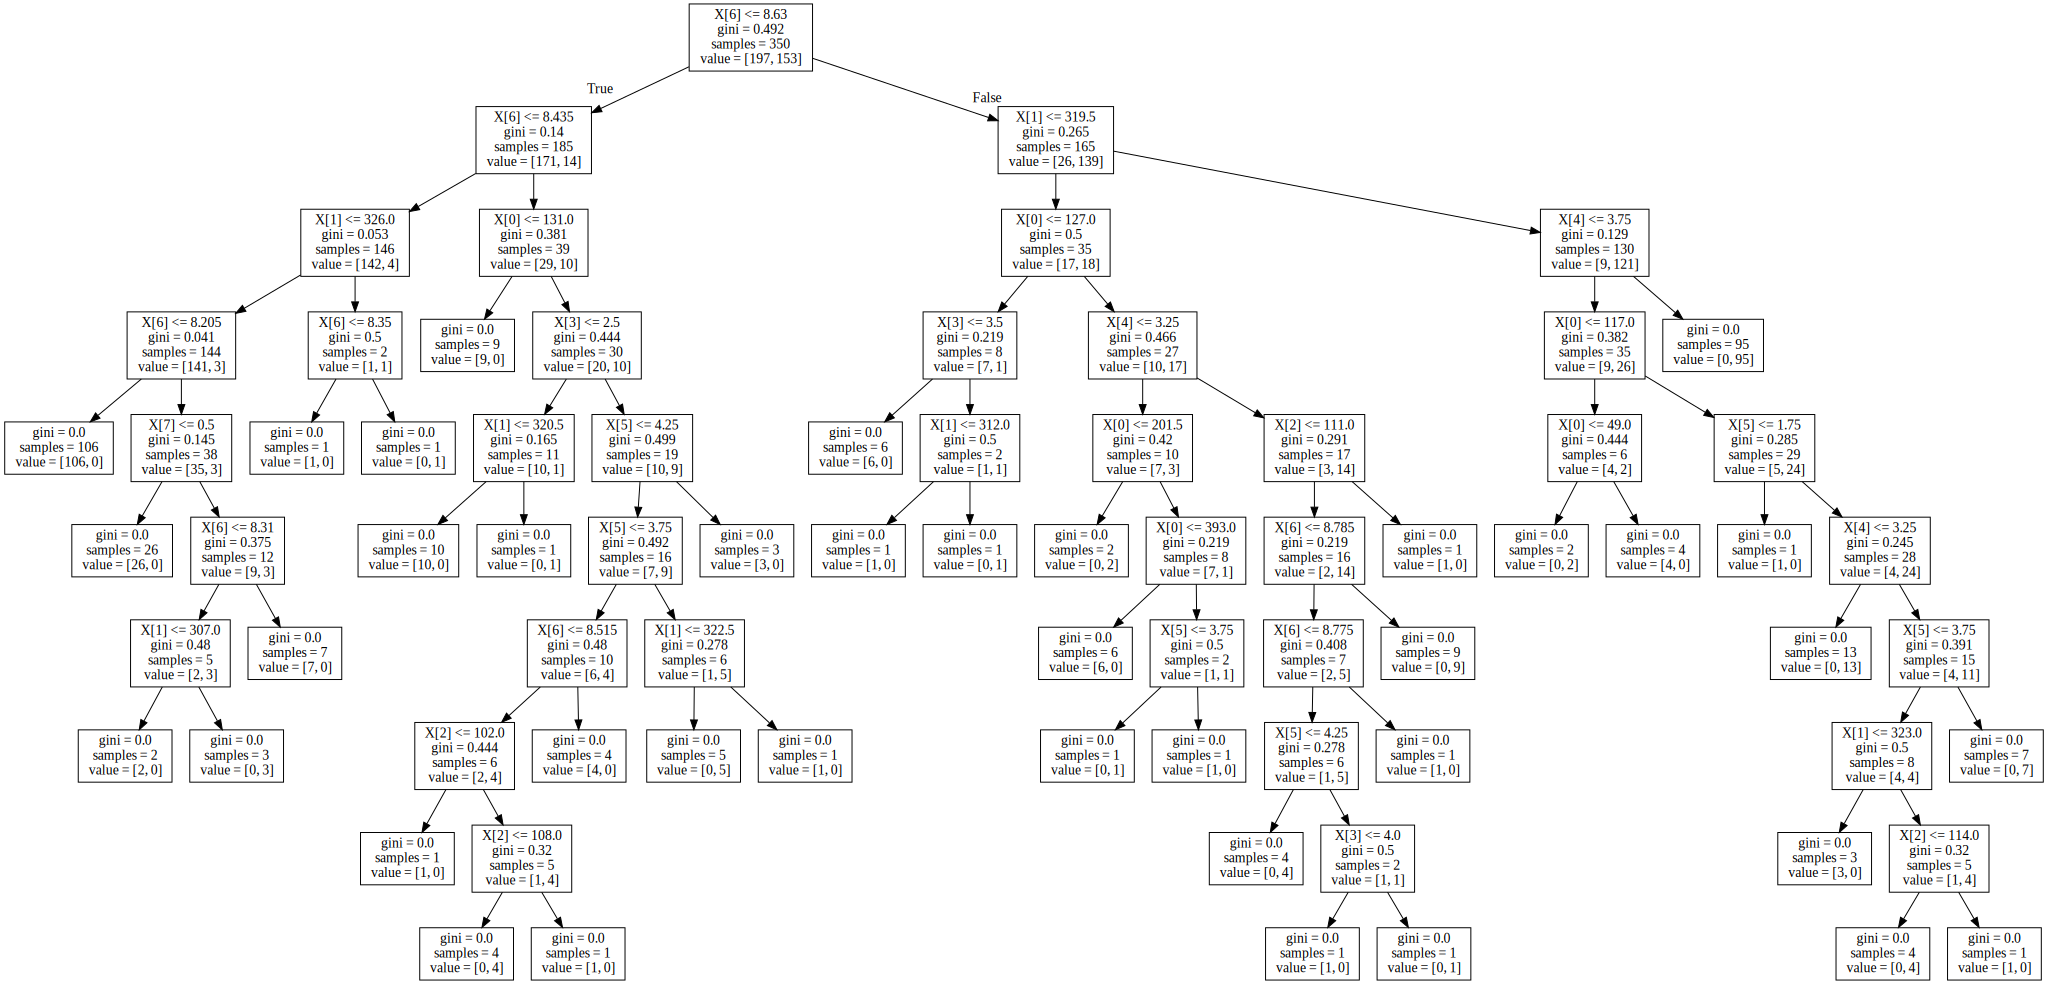

10. Classez les features les plus importantes qui déterminent les admissions 

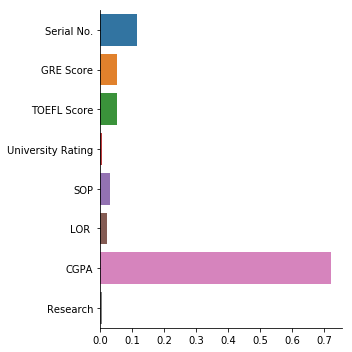

In [47]:
coeffs = pd.DataFrame(data = np.array([classifier_gini.feature_importances_]), columns = X.columns )
#coeffs = coeffs.sort_values(by = "CGPA", axis = 0, ascending=False)
sns.catplot(kind="bar", orient='h', data=coeffs)

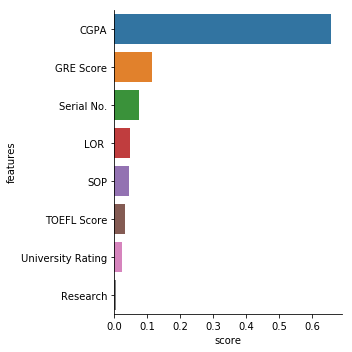

11. Essayons d'améliorer notre score. Faites une Random Forest avec 50 arbres de decision

In [48]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
clf.score(X_test, y_test)

0.8866666666666667

0.8866666666666667

12. Tentez de refaire le modèle avec uniquement 20 arbres 

In [51]:
#Create a Gaussian Classifier
clf20=RandomForestClassifier(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf20.fit(X_train,y_train)
clf20.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9

0.8933333333333333

---> Il semblerait qu'il y ait un nombre optimum d'arbres.

13. Faites une Grid Search pour trouver le nombre optimum d'arbres 

In [59]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators'      : np.arange(1,100),
    #'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    'max_features': ['auto'],
    'criterion' :['gini']
}

clfG = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clfG.fit(X_train, y_train)

print(clfG.score(X_test, y_test))
print(clfG.best_params_)



0.9
{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 92, 'random_state': 0}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 119 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 147 out of 150 | elapsed:    6.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.4s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.8933333333333333

14. Regardez les feature importance 

In [60]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf55=RandomForestClassifier(n_estimators=92, criterion='gini')

#Train the model using the training sets y_pred=clf.predict(X_test)
clf55.fit(X_train,y_train)
clf55.score(X_test, y_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.9066666666666666

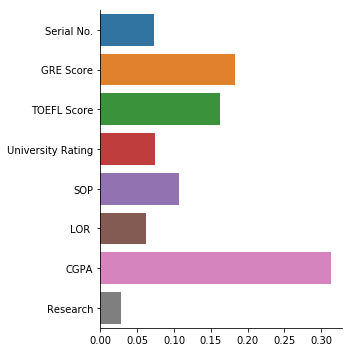

In [61]:
coeffs = pd.DataFrame(data = np.array([clf55.feature_importances_]), columns = X.columns)

sns.catplot(kind="bar", orient='h', data=coeffs)

array([0.07408172, 0.28838331, 0.14280778, 0.0880146 , 0.09202124,
       0.04311252, 0.23057896, 0.04099987])

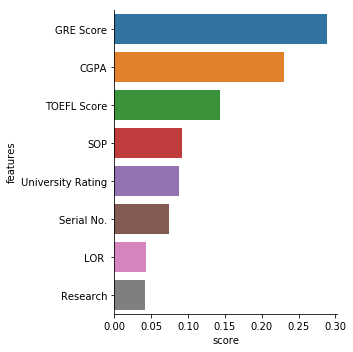